<a href="https://colab.research.google.com/github/Mustasheep/EDA_titanic/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

**Dataset:**

Vamos utilizar um dataset chamado "Titanic". Este dataset é clássico e contém informações sobre os passageiros do navio Titanic, incluindo se eles sobreviveram ou não ao naufrágio.

**Variáveis:**

*   **PassengerId:** Identificador único do passageiro.
*   **Survived:** Indica se o passageiro sobreviveu (1) ou não (0).
*   **Pclass:** Classe do passageiro (1 = primeira classe, 2 = segunda classe, 3 = terceira classe).
*   **Name:** Nome do passageiro.
*   **Sex:** Sexo do passageiro (male ou female).
*   **Age:** Idade do passageiro.
*   **SibSp:** Número de irmãos/cônjuges a bordo do Titanic.
*   **Parch:** Número de pais/filhos a bordo do Titanic.
*   **Ticket:** Número do ticket.
*   **Fare:** Tarifa paga pelo passageiro.
*   **Cabin:** Número da cabine.
*   **Embarked:** Porto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton).

# Objetivos
1.  **Carregamento e Inspeção Inicial:**
    *   Carregue o dataset usando Pandas.
    *   Exiba as primeiras e últimas linhas do dataset.
    *   Verifique o tamanho do dataset (número de linhas e colunas).
    *   Exiba informações sobre os tipos de dados e valores não nulos.
2.  **Estatísticas Descritivas:**
    *   Calcule as estatísticas descritivas para as variáveis numéricas (média, mediana, desvio padrão, mínimo, máximo, quartis).
    *   Calcule a contagem de valores para as variáveis categóricas (sexo, classe, porto de embarque).
3.  **Análise de Valores Ausentes:**
    *   Identifique as colunas com valores ausentes.
    *   Decida como lidar com os valores ausentes (preencher com a média, mediana, remover as linhas, etc.). Justifique sua escolha.
4.  **Visualização de Dados:**
    *   Crie histogramas para as variáveis numéricas (idade, tarifa).
    *   Crie gráficos de barras para as variáveis categóricas (sexo, classe, porto de embarque, sobreviventes).
    *   Crie um gráfico de dispersão para relacionar duas variáveis numéricas (idade e tarifa, por exemplo).
    *   Crie boxplots para comparar a distribuição de uma variável numérica entre diferentes grupos (idade por sexo, tarifa por classe, etc.).
5.  **Análise de Sobrevivência:**
    *   Qual a taxa geral de sobrevivência?
    *   A taxa de sobrevivência varia entre homens e mulheres?
    *   A taxa de sobrevivência varia entre as diferentes classes de passageiros?
    *   A idade influencia na taxa de sobrevivência?
    *   O porto de embarque influencia na taxa de sobrevivência?
    *   Utilize gráficos para ilustrar suas descobertas.
6.  **Conclusões:**
    *   Resuma suas principais descobertas e insights sobre o dataset.
    *   Quais variáveis parecem estar mais relacionadas à sobrevivência?
    *   Quais perguntas adicionais você gostaria de investigar com este dataset?

## Carregamento e Inspeção dos dados

Carregamento e Inspeção Inicial:
Carregue o dataset usando Pandas.
Exiba as primeiras e últimas linhas do dataset.
Verifique o tamanho do dataset (número de linhas e colunas).
Exiba informações sobre os tipos de dados e valores não nulos.

In [22]:
# Ocultando mensagens do sistema
import warnings
warnings.filterwarnings('ignore')

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import kagglehub
import os

In [24]:
# Baixando versão atual do dataset
path = kagglehub.dataset_download("brendan45774/test-file")

# Construindo o caminho do dataset para este projeto
file_path = os.path.join(path, 'tested.csv')

# Preparando DataFrame
data = pd.read_csv(file_path)
df = pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


O nosso dataset possui 418 variáveis, sendo que nas colunas `Age` , `Fare` e `Cabin` possuem valores ausentes ou nulos.

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [26]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


## Estatísticas Descritivas:

In [27]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Observando o resumo estatístico dos dados já podemos identifcar e responder fatores importantes:
- Observando a média, nota-se que sobreviveram cerca de 36% dos passageiros.
- Existem passageiros com idades de 2 meses (bebês) até 76 anos, aproximadamente.
- Alguns passageiros não estão acompanhados de parentescos, outros ja possuem até 9.
- Os valores da tarifa variam bastante, de custos em aproximadamente 8 a 31 (dentro dos quartis).

In [28]:
# Contagem de valores categóricos
df_categ = df.groupby(['Pclass', 'Sex', 'Embarked']).size().reset_index(name='Contagem').sort_values(by='Contagem', ascending=False)
df_categ

,Pclass,Sex,Embarked,Contagem
15,3,male,S,101
9,2,male,S,52
12,3,female,S,41
4,1,male,S,29
0,1,female,C,28
3,1,male,C,28
13,3,male,C,27
6,2,female,S,26
11,3,female,Q,23
2,1,female,S,21


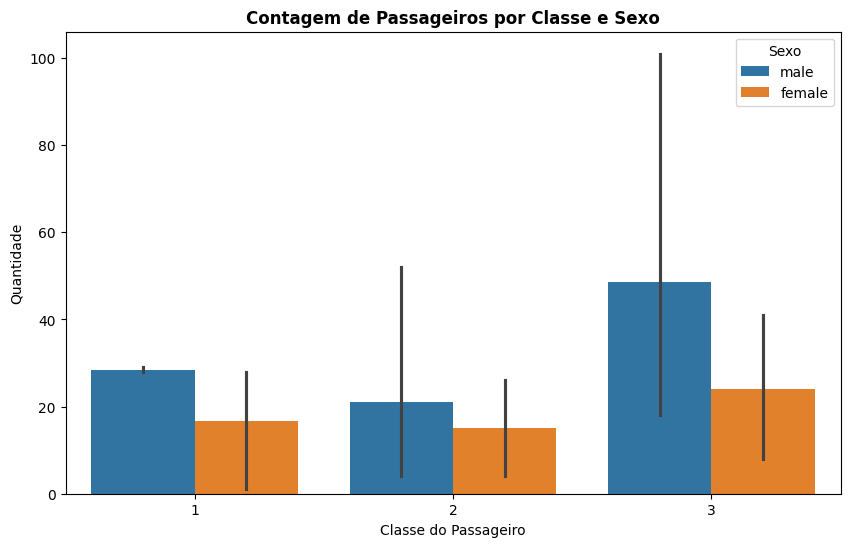

In [42]:
# Gráfico de barras agrupado
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Contagem', hue='Sex', data=df_categ)
plt.title('Contagem de Passageiros por Classe e Sexo', fontweight='bold')
plt.xlabel('Classe do Passageiro')
plt.ylabel('Quantidade')
plt.legend(title='Sexo')
plt.show()

Podemos notar quepossuem mais homens do que mulheres à bordo com uma quantidade significativa de passageiros da 3ª Classe

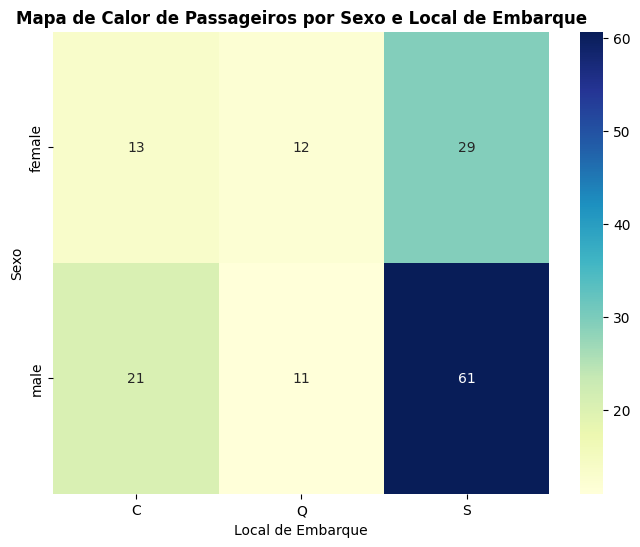

In [41]:
# Gráfico de mapa de calor
pivot_df = df_categ.pivot_table(index="Sex", columns="Embarked", values="Contagem", fill_value=0)
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df, annot=True, cmap="YlGnBu", fmt=".0f") # Changed fmt to .0f
plt.title("Mapa de Calor de Passageiros por Sexo e Local de Embarque", fontweight='bold')
plt.xlabel("Local de Embarque")
plt.ylabel("Sexo")
plt.show()

Ressaltando que:
- Embarked: Porto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton).

Podemos identificar que:
- A maior parte dos passageiros embarcaram de `Southampton`.
- Poucos passageiros embarcaram de `Queenstown`.
- Existe uma grande quantidade de homens a bordo.

## Análise de Valores Ausentes

In [31]:
valores_nulos = df.isna().sum()
valores_nulos

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


Com todas as informações acima, podemos observar que existem dados ausentes nas colunas `Age` , `Fare` e `Cabin`.

- Iremos utilizar a mediana da coluna `Age` para preencher os dados ausentes.
- Para a coluna `Fare`, por ser numérica e possuir apenas um valor ausente, substituir por 0 já será o necessário.
- Por fim, quanto à coluna `Cabin` , irei dropá-la por completo.

In [32]:
# Tratando os dados
df["Age"] = df['Age'].fillna(df['Age'].median())
df["Fare"] = df['Fare'].fillna(0)
df = df.drop('Cabin', axis=1)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.1+ KB


Com os dados atualizados e limpos, podemos prosseguir com algumas análises mais profundas e detalhadas.

## Visualização dos dados

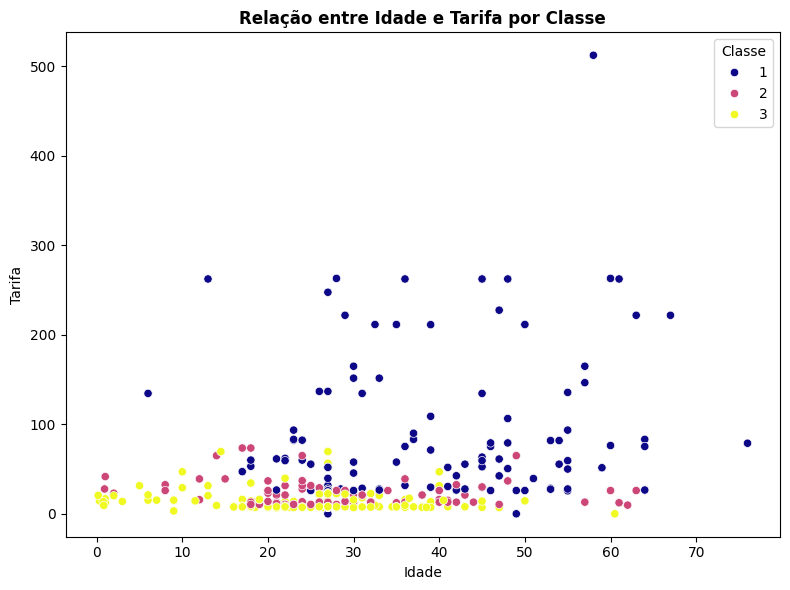

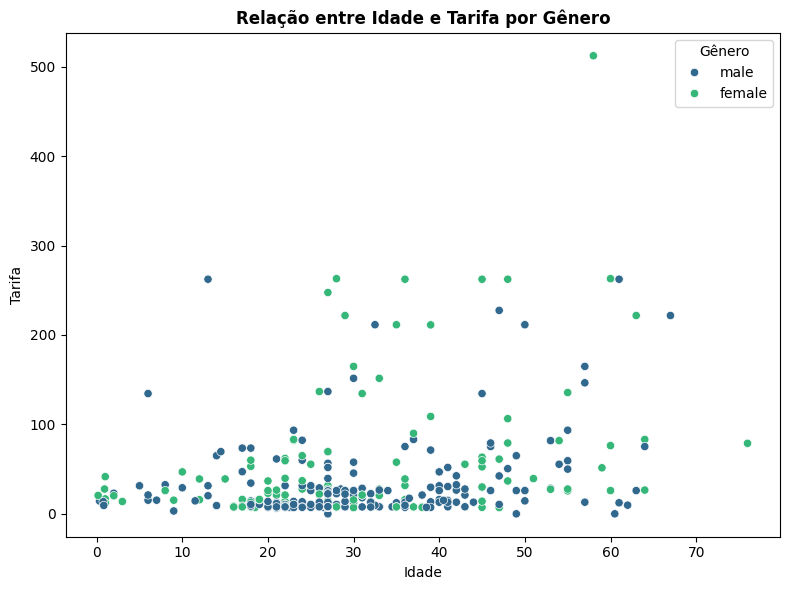

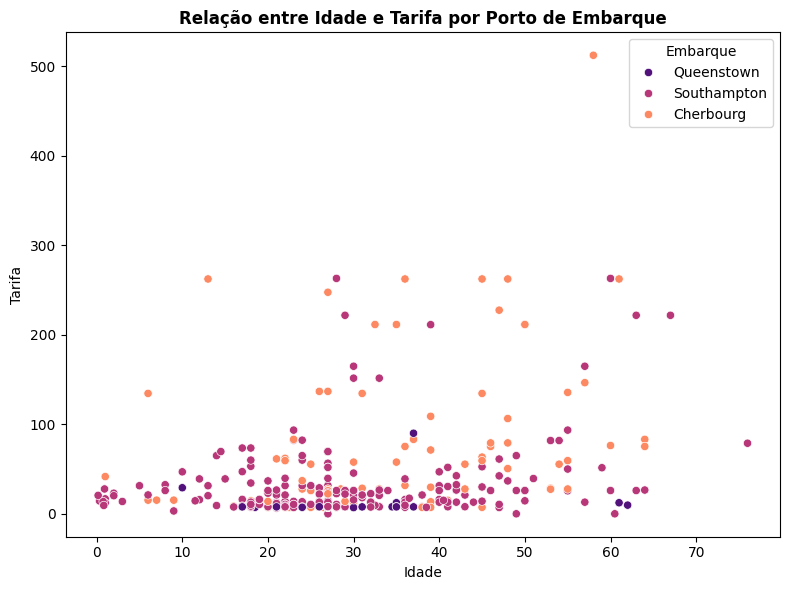

In [34]:
# Gráfico 1: Relação entre Idade e Tarifa por Classe
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', hue='Pclass', data=df, palette='plasma')
plt.title('Relação entre Idade e Tarifa por Classe', fontweight='bold')
plt.xlabel('Idade')
plt.ylabel('Tarifa')
plt.legend(title='Classe')
plt.tight_layout()

# Gráfico 2: Relação entre Idade e Tarifa por Gênero
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', hue='Sex', data=df, palette='viridis')
plt.title('Relação entre Idade e Tarifa por Gênero', fontweight='bold')
plt.xlabel('Idade')
plt.ylabel('Tarifa')
plt.legend(title='Gênero')
plt.tight_layout()

# Gráfico 3: Relação entre Idade e Tarifa por Porto de Embarque
plt.figure(figsize=(8, 6))
embarked_labels = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}
scatter = sns.scatterplot(x='Age', y='Fare', hue='Embarked', data=df, palette='magma')
plt.title('Relação entre Idade e Tarifa por Porto de Embarque', fontweight='bold')
plt.xlabel('Idade')
plt.ylabel('Tarifa')
plt.legend(title='Embarque')
handles, _ = scatter.get_legend_handles_labels()
legend = plt.legend(handles, [embarked_labels[label] for label in df['Embarked'].unique()], title='Embarque')
plt.tight_layout()

plt.show()

Com esses gráficos, podemos notar que a maior influência no custo das tarifas estão relacionados à classe escolhida (sendo a 1ª Classe mais cara e a 3ª Classe mais cara).

  Não existem relações baseadas no gênero e ao porto de embarque, mas pode-se observar que nenhum passageiro de `Queenstown` adquiriu um assento de 1ª Classe.

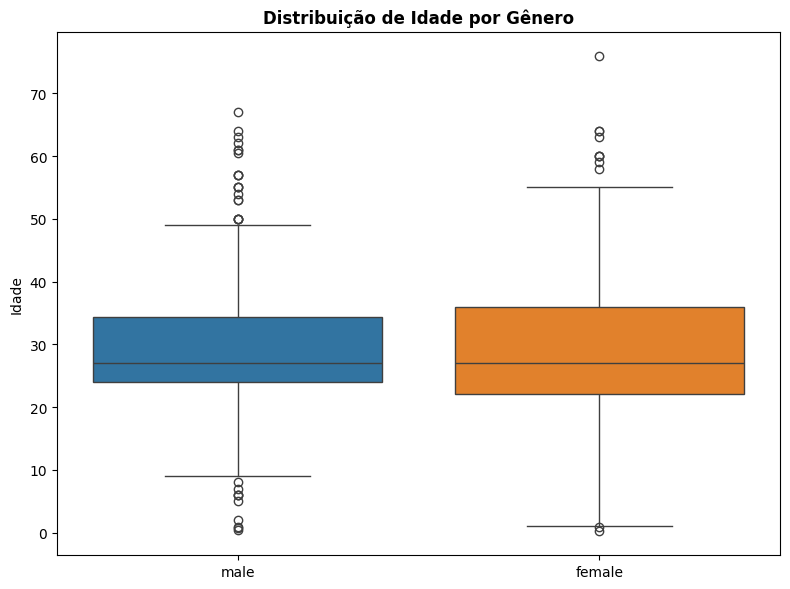

In [43]:
#Crie boxplots para comparar sexo por idade
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex', y='Age', hue='Sex', data=df)
plt.title('Distribuição de Idade por Gênero', fontweight='bold')
plt.xlabel('')
plt.ylabel('Idade')
plt.tight_layout()
plt.show()

Levando em consideração apenas os quartis e excluindo os outliers, temos uma faixa etária de:
- Homens de 10 anos à 50 anos
- Mulheres desde bebês até idosas.

## Análise de Sobrevivência:

Perguntas à serem respondidas:

- Qual a taxa geral de sobrevivência?
- A taxa de sobrevivência varia entre homens e mulheres?
- A taxa de sobrevivência varia entre as diferentes classes de passageiros?
- A idade influencia na taxa de sobrevivência?

In [36]:
# Taxa geral de sobrevivencia
sobreviventes = df['Survived'].sum()
total_passageiros = len(df)
taxa_sobrevivencia = (sobreviventes / total_passageiros) * 100
print(f"Taxa de Sobrevivência Geral: {taxa_sobrevivencia:.2f}%")

Taxa de Sobrevivência Geral: 36.36%


In [37]:
# Taxa de sobrevivência por gênero
sobreviventes_por_genero = df.groupby('Sex')['Survived'].sum()
total_por_genero = df['Sex'].value_counts()
taxa_sobrevivencia_por_genero = (sobreviventes_por_genero / total_por_genero) * 100
print(f"Taxa de Sobrevivência por Gênero:\n\n{taxa_sobrevivencia_por_genero}")

Taxa de Sobrevivência por Gênero:
Sex
female    100.0
male        0.0
dtype: float64


In [38]:
# Taxa de sobreviência por classe
sobreviventes_por_classe = df.groupby('Pclass')['Survived'].sum()
total_por_classe = df['Pclass'].value_counts()
taxa_sobrevivencia_por_classe = (sobreviventes_por_classe / total_por_classe) * 100
print(f"Taxa de Sobrevivência por Classe:\n\n{taxa_sobrevivencia_por_classe}")

Taxa de Sobrevivência por Classe:
Pclass
1    46.728972
2    32.258065
3    33.027523
dtype: float64


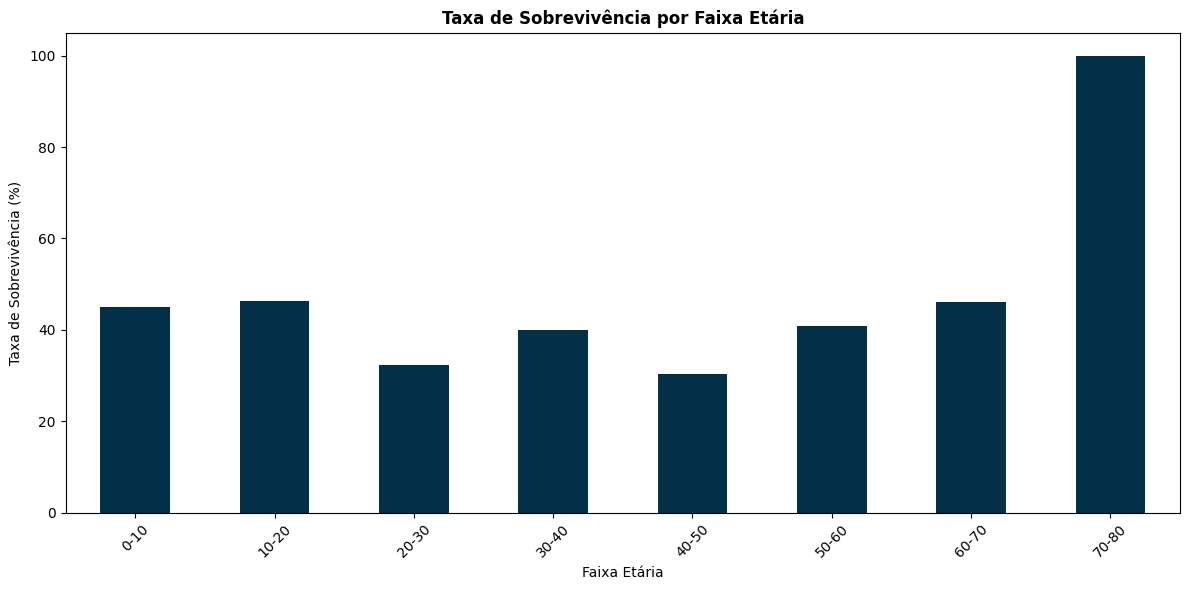

In [39]:
# Agrupando as idades em intervalos para evitar espalhamento
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


# Taxa de sobrevivência por faixa etária
sobreviventes_por_faixa_etaria = df.groupby('Age_Group')['Survived'].sum()
total_por_faixa_etaria = df['Age_Group'].value_counts()
taxa_sobrevivencia_por_faixa_etaria = (sobreviventes_por_faixa_etaria / total_por_faixa_etaria) * 100

# Arredondar e formatar as porcentagens
taxa_sobrevivencia_por_faixa_etaria = taxa_sobrevivencia_por_faixa_etaria.round(2)
taxa_sobrevivencia_por_faixa_etaria = taxa_sobrevivencia_por_faixa_etaria.apply(lambda x: f"{x}%")

# Criando o Gráfico
plt.figure(figsize=(12, 6))
taxa_sobrevivencia_por_faixa_etaria.sort_index().str.replace('%', '').astype(float).plot(kind='bar', color='#023047')
plt.title('Taxa de Sobrevivência por Faixa Etária', fontweight='bold')
plt.xlabel('Faixa Etária')
plt.ylabel('Taxa de Sobrevivência (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Conclusão

Podemos concluir e com as seguintes informações:
- Houveram diversos sobreviventes, cerca de `37%` dos passageiros, sendo todos do gênero feminino (desde bebês até idosas).
- A maior parte dos passageiros são de `Southampton`.
- Nenhum passageiro de `Queenstown` adquiriu uma cabine de 1ª Classe, talvez pela cidade possuir habitantes de classe inferior naquela época.
- Não houveram homens sobreviventes, provavelmente por dar prioridade e salvar vidas de bebês, crianças, mulheres e idosos.